# 決定木を用い, タイタニック号の乗客の情報から生存したか否かを予測
# Using decision trees, we predict whether the passengers of the Titanic survived or not based on the information of the passengers.

## データセット/Dataset
* train.csv: トレーニングデータです. 顧客情報と生存の有無が記載されています. これを学習用データとして利用します.
* test.csv: テストデータです. 生存の有無の項目を除く顧客情報が記載されています. この情報を元に生存の有無を予測します.
* train.csv: Training data. It contains customer information and whether the customer is still alive or not. This is used as training data.
* test.csv: Test data. It contains customer information except for the " whether the customer is alive or not " item. This information is used to predict whether the customer is alive or not.
---
## データ項目/Data item
* PassengerId: 乗客識別連番ID/Passenger Identification Sequential Number ID
* Survived: 生存の有無（0=死亡、1=生存）/Survival (0=dead, 1=alive)
* Pclass: チケットクラス（1=上層クラス, 2=一般クラス, 3=下層クラス）/Ticket Class (1=Upper Class, 2=General Class, 3=Lower Class)
* Name: 乗客の名前/Passenger's Name
* Sex: 性別（male=男性, female＝女性）/Gender (male=male, female=female)
* Age: 年齢/Age
* SibSp: タイタニックに同乗している兄弟配偶者の数/Number of sibling spouses on board the Titanic.
* Parch: タイタニックに同乗している親子供の数/Number of parents and children boarding with the Titanic
* Ticket: チケット番号/Ticket Number
* Fare: 料金/Fee
* Cabin: 客室番号/Room Number
* Embarked: 出港地（C = Cherbourg, Q = Queenstown, S = Southampton）/Departure point (C = Cherbourg, Q = Queenstown, S = Southampton)
---
## トレーニングデータとテストデータの違い/Difference between training data and test data
* トレーニングデータは学習に用い, テストデータはモデルの性能評価に使用します.
* Training data is used for training, and test data is used to evaluate the performance of the model.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# モジュールをインポートします/Import Modules
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/7data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/7data/test.csv')

print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# データの変換/Data conversion
# maleを0に, femaleを1に変換/Convert male to 0, female to 1
train["Sex"] = train["Sex"].map({"male":0,"female":1})
test["Sex"] = test["Sex"].map({"male":0,"female":1})
# EmbarkedのOne-Hotエンコーディング/Embarked's One-Hot encoding
train = pd.get_dummies(train, columns=['Embarked'])
test = pd.get_dummies(test, columns=['Embarked'])

# 不要な列の削除/Delete unnecessary columns
train.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [4]:
# NaNの存在確認と除去/Confirmation of NaN presence and removal
print(train.isnull().sum())

train2 = train.dropna()
test2 = test.dropna()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 訓練データから説明変数と目的変数を決定します/Determine explanatory and objective variables from training data
X_train = train2.drop(['Survived'], axis=1)  # X_trainはtrainのSurvived列以外
y_train = train2['Survived']  # y_trainはtrainのSurvived列

# X_trainとY_trainをtrainとvalidに分割/Split X_train and Y_train into train and valid
train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

In [6]:
import sklearn.tree as tree

# 決定木の作成/Creating Decision Trees
clf = tree.DecisionTreeClassifier(max_depth=4)

# fit()で学習させる. 第一引数に説明変数, 第二引数に目的変数/Let it learn with fit(). Explanatory variable as the first argument, Objective variable as the second argument
model = clf.fit(train_x, train_y)

# データを用いて予測/Predict with data
predicted = model.predict(valid_x)
print(accuracy_score(predicted,valid_y))

0.7902097902097902


In [7]:
# 3分割交差検証を指定し, インスタンス化/Instantiate with 3-part cross-validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=0)

# スコアとモデルを格納するリスト/List to store scores and models
score_list = []
models = []

# 各分割ごとに評価/Evaluation for each division
for fold_, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):    
    print(f'fold{fold_ + 1} start')
    train_x = X_train.iloc[train_index]
    valid_x = X_train.iloc[valid_index]
    train_y = y_train.iloc[train_index]
    valid_y = y_train.iloc[valid_index]
    
    # 分割データで学習・予測・評価/Training, prediction, and evaluation with split data
    clf = tree.DecisionTreeClassifier(max_depth=4)
    model = clf.fit(train_x, train_y)
    
    # データを用いて予測，記録/Predict with data, record
    predicted = model.predict(valid_x)
    score_list.append(accuracy_score(predicted,valid_y))
    models.append(model)
print(score_list, 'average_score', round(np.mean(score_list), 3))

fold1 start
fold2 start
fold3 start
[0.8067226890756303, 0.7647058823529411, 0.819327731092437] average_score 0.797


In [8]:
from sklearn.metrics import confusion_matrix

# 混同行列の作成/Creating a confusion matrix
cmatrix = confusion_matrix(valid_y,predicted)

# pandasで表の形にする/Form a table in pandas.
df = pd.DataFrame(cmatrix,index=["actual_died","actual_survived"],columns=["pred_died","pred_survived"])

print(df)

                 pred_died  pred_survived
actual_died            131             14
actual_survived         29             64


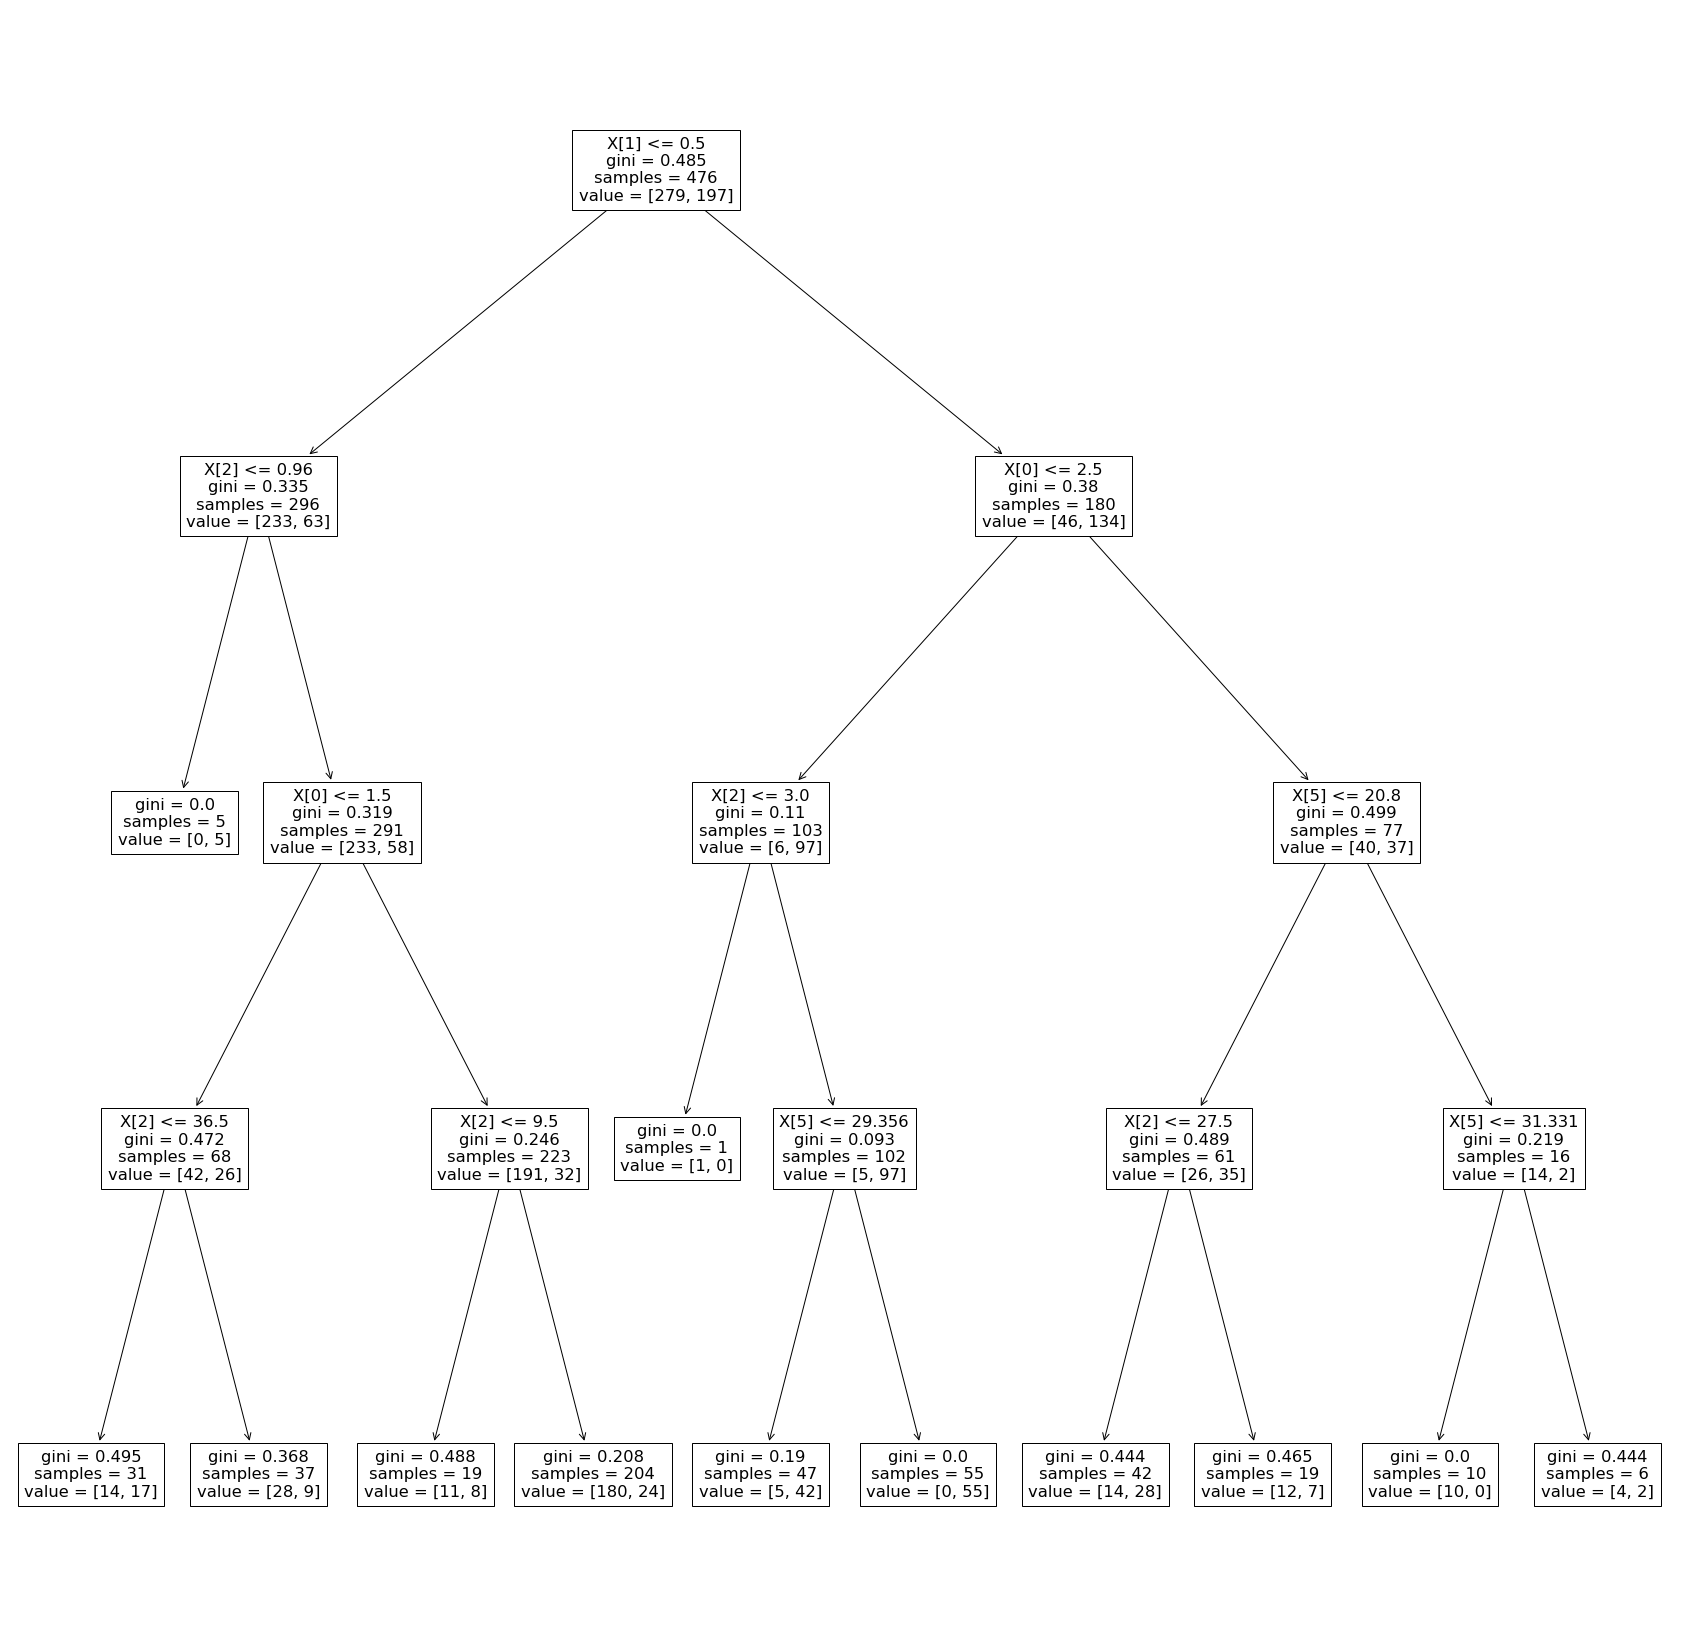

In [9]:
# 図1/Figure 1
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 30)) 
tree.plot_tree(model, ax=ax)
plt.show()

In [10]:
!pip install dtreeviz
# graphvizによる視覚化/Visualization with graphviz
import pydotplus as pdp

file_name = "/content/drive/MyDrive/Colab Notebooks/7data/tree_visualization.png"
dot_data = tree.export_graphviz(model, # 決定木オブジェクトを一つ指定/Specify a single decision tree object
                                out_file=None, # ファイルは介さずにGraphvizにdot言語データを渡すのでNone/Set to None because dot language data is passed to Graphviz without going through the file
                                filled=True, # Trueにすると分岐の際にどちらのノードに多く分類されたのか色で示してくれる/If set to True, it will indicate in color which node is classified more frequently at the time of branching
                                rounded=True, # Trueにするとノードの角を丸く描画する/If set to True, the node is drawn with rounded corners
                                feature_names=train_x.columns, # これを指定しないとチャート上で特徴量の名前が表示されない/If this is not specified, the name of the feature will not appear on the chart
                                class_names=['Dead','Sruvived'], # これを指定しないとチャート上で分類名が表示されない/If you do not specify this, the classification name will not appear on the chart
                                special_characters=True # 特殊文字を扱えるようにする/Allow special characters to be handled
                                )
graph = pdp.graph_from_dot_data(dot_data)
graph.write_png(file_name)

# dtreevizによる視覚化/Visualization with dtreeviz
from dtreeviz.trees import dtreeviz

viz = dtreeviz(
    model,
    train_x, 
    train_y,
    target_name='alive',
    feature_names=train_x.columns,
    class_names=['Dead','Sruvived']
) 

#viz.view() # 外窓で画像を開く/Open image in outer window
viz.save('/content/drive/MyDrive/Colab Notebooks/7data/dtreeviz.svg')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 172 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.6-py3-none-any.whl size=67326 sha256=8044967021c241065b8fe4d9867ebc1178305ecc5baa56904cb7cbfc6627b6d9
  Stored in directory: /root/.cache/pip/wheels/33/76/fe/99227ff871766e7284bb88d3d28e2f4886b8ec04d669033478
Successfully built dtreeviz


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


{'Pclass': 0.22198751305914832, 'Sex': 0.5687679329042562, 'Age': 0.15069654009838473, 'SibSp': 0.0, 'Parch': 0.0, 'Fare': 0.058548013938210734, 'Embarked_C': 0.0, 'Embarked_Q': 0.0, 'Embarked_S': 0.0}


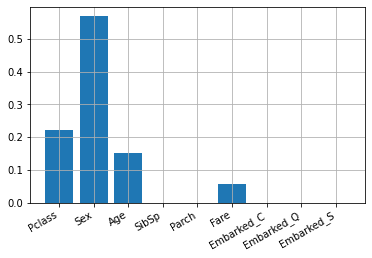

In [11]:
# 重要度を表示/Indicate importance
print(dict(zip(train_x.columns, model.feature_importances_)))

# bar plot
fig, ax = plt.subplots()
plt.grid()
ax.bar(train_x.columns,model.feature_importances_)
fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
plt.show()